Hola **Lucero**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
--
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Cómo Data Analyst debes cuidar siempre la presentación de tus notebook, por eso al inicio del notebook debes redactar un título general y una breve introducción en una celda tipo Markdown
</div>

ANALISIS DE VENTAS DE EMPRESA SHOWZ

En el siguiente codigo se muestran varios analisis de las ventas y gastos en marketing de la empresa.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Así se entiende mejor desde un inicio, te recomendaría amplicar un poco la introducción y también para los títulos escribirlos de esta forma `# Título` para que se vean así:

# Título
</div>

In [63]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

visitas=pd.read_csv("/datasets/visits_log_us.csv")
pedido=pd.read_csv("/datasets/orders_log_us.csv")
costo=pd.read_csv("/datasets/costs_us.csv")

In [64]:
costo.columns=['anuncio', 'fecha', 'costo']
costo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   anuncio  2542 non-null   int64  
 1   fecha    2542 non-null   object 
 2   costo    2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [65]:
pedido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [66]:
pedido.head(1)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.0,10329302124590727494


In [67]:
visitas.head(1)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062


In [68]:
visitas.info()
visitas.columns=['aparato', 'fecha_fin', 'id_anuncio', 'fecha_inicio', 'uid'] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [69]:
visitas.head(1)

,aparato,fecha_fin,id_anuncio,fecha_inicio,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062


In [70]:
visitas['fecha_fin_date']=pd.to_datetime(visitas['fecha_fin'])
visitas['fecha_inicio_date']=pd.to_datetime(visitas['fecha_inicio'])

In [71]:
visitas['sesion_year']=visitas['fecha_inicio_date'].dt.isocalendar().year
visitas['sesion_mes']=visitas['fecha_inicio_date'].dt.month
visitas['sesion_semana']=visitas['fecha_inicio_date'].dt.isocalendar().week
visitas['sesion_fecha']=visitas['fecha_inicio_date'].dt.date

<AxesSubplot:xlabel='sesion_fecha'>

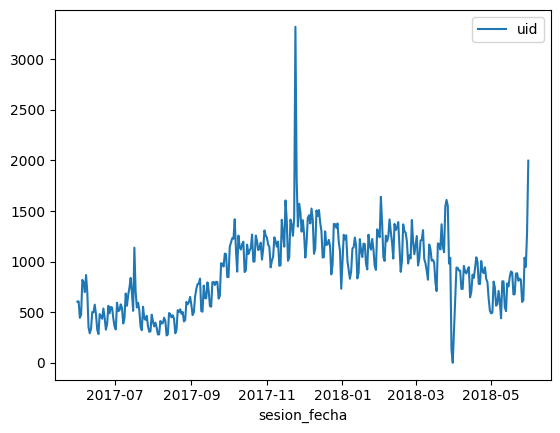

In [72]:
dau=visitas.groupby('sesion_fecha').agg({'uid': 'nunique'})
#dau:usuarios activos diarios
dau.plot()

En diciembre de 2017 hubo mas usuarios

In [73]:
mau=visitas.groupby('sesion_mes').agg({'uid': 'nunique'})
#mau:usuarios activos por mes

<AxesSubplot:title={'center':'Usuarios por mes'}, xlabel='mes', ylabel='usuarios'>

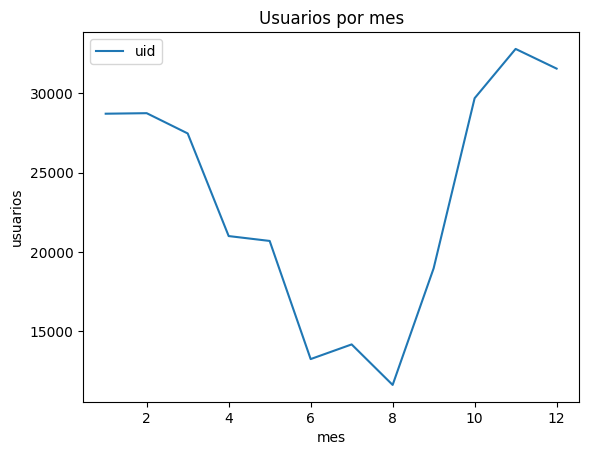

In [74]:
mau.plot(xlabel='mes', ylabel='usuarios', title='Usuarios por mes')

En los meses 6-8 hubo menos usuarios, en los meses de diciembre y enero hubo mas usuarios.

<AxesSubplot:xlabel='sesion_semana'>

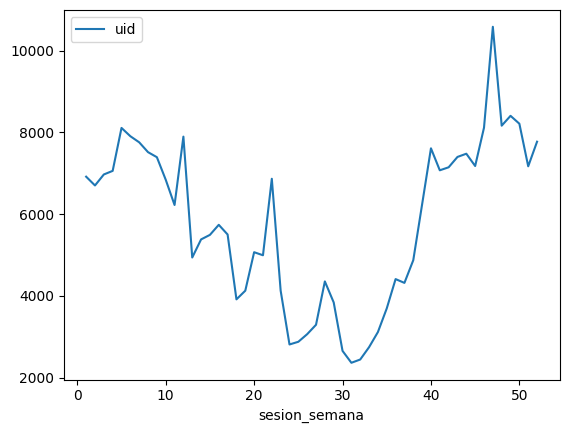

In [75]:
semana_usuarios=visitas.groupby('sesion_semana').agg({'uid': 'nunique'})
semana_usuarios.plot()

En las sesiones por semana se observa mas variabilidad, pero igual en las semanas 20-30 hubo menos usuarios.

<AxesSubplot:xlabel='sesion_fecha'>

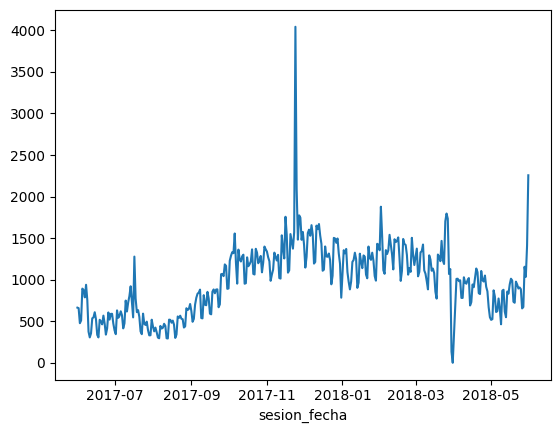

In [76]:
sesiones_dia=visitas.groupby('sesion_fecha')['fecha_inicio'].count()
sesiones_dia.plot()

Hubo mas sesiones en Diciembre que en cualquier otro dia, el comportamiento es similar a la cantidad de usuarios.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Estás mostrando sólo datos numéricos que para explicar será un poco más complejo. Siempre que tengas datos de tiempo trata de dejar una gráfica de líneas y no olvides redactar tus interpretaciones sobre las gráficas mostradas
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Muy bien! Siempre hay que buscar una forma visual de explicar los resultados
</div>

DURACION DE LAS SESIONES

In [77]:
visitas['duracion']=visitas['fecha_fin_date']-visitas['fecha_inicio_date']
visitas['duracion']

0        0 days 00:18:00
1        0 days 00:28:00
2        0 days 00:00:00
3        0 days 00:24:00
4        0 days 00:00:00
               ...      
359395   0 days 00:00:19
359396   0 days 00:00:19
359397   0 days 00:00:19
359398   0 days 00:00:19
359399   0 days 00:00:19
Name: duracion, Length: 359400, dtype: timedelta64[ns]

FRECUENCA USUARIOS REGRESAN

In [78]:
sesiones_por_usuario=visitas.groupby(['sesion_year', 'sesion_mes']).agg({'uid':['count', 'nunique']})
sesiones_por_usuario.columns=['n_sesiones', 'n_usuarios']
sesiones_por_usuario['sesiones_por_usuario']=(sesiones_por_usuario['n_sesiones']/sesiones_por_usuario['n_usuarios'])
sesiones_por_usuario

n_sesiones  n_usuarios  sesiones_por_usuario
sesion_year sesion_mes                                              
2017        6                16505       13259              1.244815
            7                17828       14183              1.256998
            8                14355       11631              1.234202
            9                23907       18975              1.259921
            10               37903       29692              1.276539
            11               43969       32797              1.340641
            12               41983       31557              1.330386
2018        1                36939       28716              1.286356
            2                37182       28749              1.293332
            3                35679       27473              1.298693
            4                26515       21008              1.262138
            5                26635       20701              1.286653

In [79]:
pedido.columns=['fecha_compra', 'ganancia', 'uid']
pedido['fecha_compra']=pd.to_datetime(pedido['fecha_compra'])
fecha_primera_compra_usuario=pedido.groupby('uid')['fecha_compra'].min()
fecha_primera_compra_usuario.name='fecha_primera_compra'
fecha_primera_compra_usuario=fecha_primera_compra_usuario.reset_index()
fecha_primera_compra_usuario.head()

,uid,fecha_primera_compra
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00


In [80]:
fecha_registro=visitas.groupby('uid')['fecha_inicio_date'].min()
fecha_registro.name='fecha_registro'
fecha_registro=fecha_registro.reset_index()
datos_fecha=fecha_primera_compra_usuario.merge(fecha_registro, on='uid')

In [81]:
datos_fecha['conversion']=(datos_fecha['fecha_primera_compra']-datos_fecha['fecha_registro'])
datos_fecha['dias']=datos_fecha['conversion'].apply(lambda x: int(x.total_seconds()/86400))
datos_fecha.describe()

,uid,conversion,dias
count,3.652300e+04,36523,36523.000000
mean,9.213152e+18,16 days 21:40:10.550064343,16.729869
std,5.324792e+18,47 days 01:44:46.481416776,46.959088
min,3.135781e+14,0 days 00:00:00,0.000000
25%,4.615081e+18,0 days 00:04:00,0.000000
50%,9.245161e+18,0 days 00:16:00,0.000000
75%,1.383709e+19,2 days 00:17:00,2.000000
max,1.844617e+19,363 days 07:04:00,363.000000


<AxesSubplot:ylabel='Frequency'>

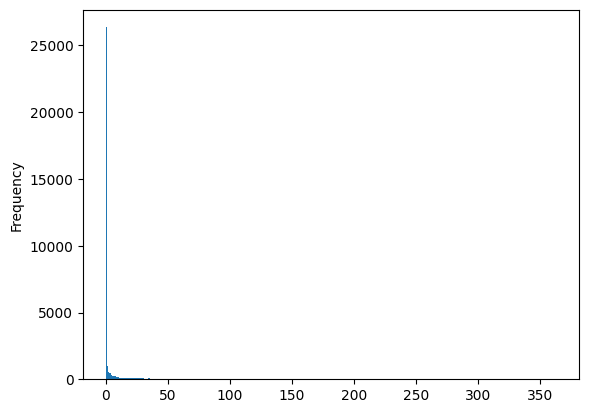

In [82]:
datos_fecha['dias'].plot(kind='hist', bins=363)

El 50% de usuarios hacen la conversion en el primer dia, el 25% lo hace en dos dias, el otro 25% tarda de 1-363 dias

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Siempre que presentes una gráfica debes dejar un breve comentario con su interpretación para que el proceso de análisis sea claro
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Correcto, es importante dejar un proceso de análisis claro
</div>

CANAL MARKETING CON MAYOR NUMERO USUARIOS REGRESAN

In [83]:
anuncios=visitas.groupby(['id_anuncio']).agg({'uid':['count', 'nunique']})
anuncios.columns=['n_sesiones', 'n_usuarios']
anuncios['sesiones_por_usuario']=(anuncios['n_sesiones']/anuncios['n_usuarios'])
anuncios

,n_sesiones,n_usuarios,sesiones_por_usuario
id_anuncio,,,
1,34121,18999,1.795937
2,47626,26245,1.814669
3,85610,74756,1.145192
4,101794,83525,1.218725
5,66905,56974,1.174308
6,6,6,1.000000
7,36,34,1.058824
9,13277,9264,1.433182
10,10025,8067,1.242717


El canal 2 de marketing es el que tiene el mayor numero de usuarios que regresan a visitar la pagina

CUANTOS PEDIDOS HACEN EN UN MES

In [84]:
pedido['mes'] = pedido['fecha_compra'].astype('datetime64[M]')

<AxesSubplot:title={'center':'Pedidos'}, xlabel='mes'>

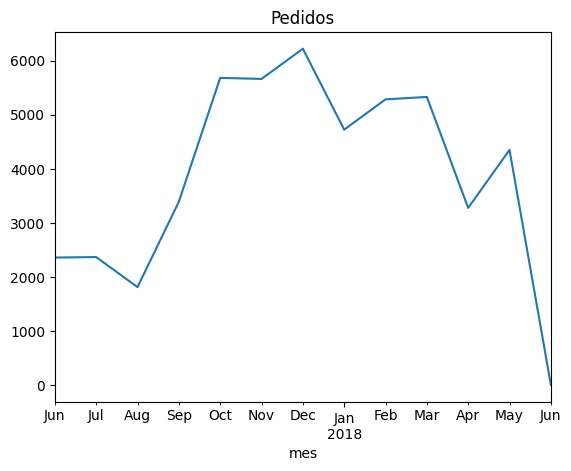

In [85]:
pedido_mes=pedido.groupby('mes')['uid'].count()
pedido_mes.plot(title='Pedidos')

en diciembre hacen mas pedidos

<div class="alert alert-block alert-danger">
<s><b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Aquí también se podría complementar con una gráfica de líneas
</div></s>

TAMAÑO PROMEDIO COMPRA

In [86]:
promedio=pedido['ganancia'].mean()
promedio

4.999646930477041

In [87]:
#compra_promedio_usuario=pedido.groupby('uid')['ganancia'].mean()
#compra_promedio_usuario

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Realizar cálculos a detalle está muy bien, pero llegar a algo tan granular cómo por ID y mostrarlo sólo de esta forma no es buena práctica ya que no se puede analizar bien. Lo mejor es tener un cálculo a detalle que sea entendible, por ejemplo, puedes calcular el LTV por cohort y dejar una gráfica de barras con ese resultado, siempre redactando la interpretación de esa gráfica
</div>

Respuesta estudiante: esta parte la agregue abajo (grafica LTV por cohorte), pienso esto es lo que pide

calculo de LTV

In [88]:
costo['mes'] = costo['fecha'].astype('datetime64[M]')

In [89]:
primer_pedido_mes = pedido.groupby('uid').agg({'mes': 'min'}).reset_index()
primer_pedido_mes.columns = ['uid', 'primer_pedido_mes']
primer_pedido_mes.head()

,uid,primer_pedido_mes
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


In [90]:
cohorte = primer_pedido_mes.groupby('primer_pedido_mes').agg({'uid': 'nunique'}).reset_index()
cohorte.columns = ['primer_pedido_mes', 'n_compradores']
cohorte.head(2)

,primer_pedido_mes,n_compradores
0,2017-06-01,2023
1,2017-07-01,1923


In [91]:
pedido_completo=pd.merge(pedido, primer_pedido_mes, on='uid')
pedido_completo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50415 entries, 0 to 50414
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fecha_compra       50415 non-null  datetime64[ns]
 1   ganancia           50415 non-null  float64       
 2   uid                50415 non-null  uint64        
 3   mes                50415 non-null  datetime64[ns]
 4   primer_pedido_mes  50415 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), uint64(1)
memory usage: 2.3 MB


In [92]:
cohorte_mes=pedido_completo.groupby(['primer_pedido_mes', 'mes']).agg({'ganancia':'sum'}).reset_index()
cohorte_mes.head(3)

,primer_pedido_mes,mes,ganancia
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34


In [93]:
reporte=pd.merge(cohorte, cohorte_mes, on='primer_pedido_mes')
reporte.head(1)

,primer_pedido_mes,n_compradores,mes,ganancia
0,2017-06-01,2023,2017-06-01,9557.49


In [94]:
taza_margen=.5
reporte['gp']=reporte['ganancia']*taza_margen
reporte['edad']=(reporte['mes']-reporte['primer_pedido_mes'])/np.timedelta64(1, 'M')
reporte['edad']=reporte['edad'].round().astype('int')

In [95]:
reporte.head(1)

,primer_pedido_mes,n_compradores,mes,ganancia,gp,edad
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,0


In [96]:
reporte['ltv']=reporte['gp']/reporte['n_compradores']
reporte.head(2)

,primer_pedido_mes,n_compradores,mes,ganancia,gp,edad,ltv
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207
1,2017-06-01,2023,2017-07-01,981.82,490.910,1,0.242664


<AxesSubplot:title={'center':'LTV por cohorte'}, xlabel='cohorte por mes de primer pedido', ylabel='LTV promedio'>

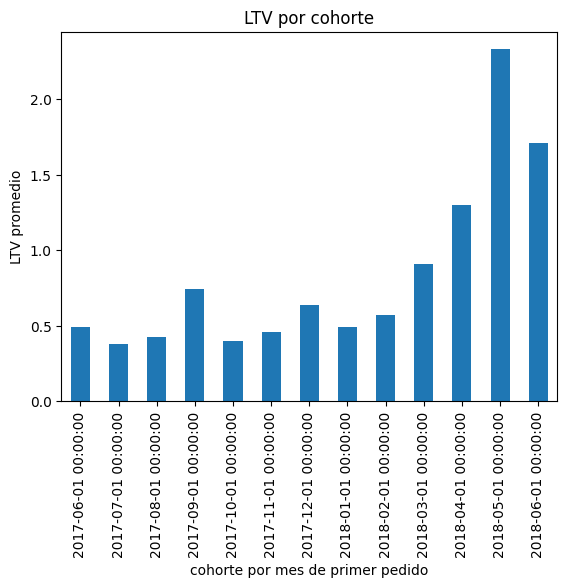

In [97]:
ltv_tabla=reporte.groupby('primer_pedido_mes')['ltv'].mean()
ltv_tabla.plot(kind='bar', title='LTV por cohorte', ylabel='LTV promedio', xlabel='cohorte por mes de primer pedido')

La cohorte del mes de Mayo es la que presenta el LTV promedio mas alto

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Así está muy bien Lucero! Aunque para mejorar la visualización te recomiendo remover la precisión de tiempo en horas, minutos y segundos y dejar sólo la fecha
</div>

In [98]:
output=reporte.pivot_table(index='primer_pedido_mes', 
    columns='edad', 
    values='ltv', 
    aggfunc='mean').round()

output.fillna('')

edad,0,1,2,3,4,5,6,7,8,9,10,11
primer_pedido_mes,,,,,,,,,,,,
2017-06-01,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-07-01,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
2017-08-01,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,
2017-09-01,3.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,,,
2017-10-01,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,
2017-11-01,3.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,,
2017-12-01,2.0,0.0,0.0,1.0,0.0,0.0,,,,,,
2018-01-01,2.0,0.0,0.0,0.0,0.0,,,,,,,
2018-02-01,2.0,0.0,0.0,0.0,,,,,,,,


COSTO TOTAL POR FUENTE DE ANUNCIO

In [99]:
costo_anuncio=costo.groupby(['anuncio'])['costo'].sum()
costo_anuncio.head(10)

anuncio
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costo, dtype: float64

In [100]:
ltv_201706 = output.loc['2017-06-01'].sum()
ltv_201706

3.0

In [101]:
cohort_201706 = reporte[reporte['primer_pedido_mes'] == '2017-06-01']

# calcular los costos para el mes de la cohorte
costo_201706 = costo[costo['mes'] == '2017-06-01']['costo'].sum()

n_compradores_201706 = cohort_201706['n_compradores'][0]
cac_201706 = costo_201706 / n_compradores_201706
ltv_201706   = output.loc['2017-06-01'].sum()

print('CAC =', cac_201706)
print('LTV =', ltv_201706)

CAC = 8.905091448344043
LTV = 3.0


In [102]:
costo_mensual = costo.groupby('mes')['costo'].sum()
costo_mensual.head()

mes
2017-06-01    18015.00
2017-07-01    18240.59
2017-08-01    14790.54
2017-09-01    24368.91
2017-10-01    36322.88
Name: costo, dtype: float64

In [103]:
reporte_unido=pd.merge(reporte, costo_mensual, left_on='primer_pedido_mes', right_on='mes')
reporte_unido['cac'] =reporte_unido['costo'] / reporte_unido['n_compradores']
reporte_unido.head(1)

,primer_pedido_mes,n_compradores,mes,ganancia,gp,edad,ltv,costo,cac
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207,18015.0,8.905091


In [104]:
reporte_pivot=reporte_unido.pivot_table(index='primer_pedido_mes', columns='edad', values='cac')
reporte_pivot

edad,0,1,2,3,4,5,6,7,8,9,10,11
primer_pedido_mes,,,,,,,,,,,,
2017-06-01,8.905091,8.905091,8.905091,8.905091,8.905091,8.905091,8.905091,8.905091,8.905091,8.905091,8.905091,8.905091
2017-07-01,9.485486,9.485486,9.485486,9.485486,9.485486,9.485486,9.485486,9.485486,9.485486,9.485486,9.485486,NaN
2017-08-01,10.796015,10.796015,10.796015,10.796015,10.796015,10.796015,10.796015,10.796015,10.796015,10.796015,NaN,NaN
2017-09-01,9.441654,9.441654,9.441654,9.441654,9.441654,9.441654,9.441654,9.441654,9.441654,NaN,NaN,NaN
2017-10-01,8.369327,8.369327,8.369327,8.369327,8.369327,8.369327,8.369327,8.369327,NaN,NaN,NaN,NaN
2017-11-01,9.288870,9.288870,9.288870,9.288870,9.288870,9.288870,9.288870,NaN,NaN,NaN,NaN,NaN
2017-12-01,8.741809,8.741809,8.741809,8.741809,8.741809,8.741809,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,9.937302,9.937302,9.937302,9.937302,9.937302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,8.962758,8.962758,8.962758,8.962758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Para tener más claridad de las métricas recomendaría calcular el CAC, los gastos totales así cómo se calculó el ROMI, con un pivot_table 
</div>

CALCULO DE ROMI

In [105]:
reporte_unido['romi'] = reporte_unido['ltv'] / reporte_unido['cac']
output_romi = reporte_unido.pivot_table(
    index='primer_pedido_mes', 
    columns='edad', 
    values='romi', 
    aggfunc='mean')

pivot_romi=output_romi.cumsum(axis=1).round(2)
pivot_romi

edad,0,1,2,3,4,5,6,7,8,9,10,11
primer_pedido_mes,,,,,,,,,,,,
2017-06-01,0.27,0.29,0.32,0.37,0.43,0.47,0.52,0.56,0.59,0.62,0.65,0.67
2017-07-01,0.32,0.33,0.37,0.39,0.40,0.40,0.41,0.42,0.43,0.43,0.44,NaN
2017-08-01,0.24,0.27,0.29,0.31,0.33,0.34,0.35,0.37,0.38,0.39,NaN,NaN
2017-09-01,0.30,0.36,0.39,0.60,0.62,0.65,0.69,0.70,0.71,NaN,NaN,NaN
2017-10-01,0.30,0.33,0.34,0.35,0.36,0.37,0.37,0.38,NaN,NaN,NaN,NaN
2017-11-01,0.28,0.30,0.31,0.33,0.34,0.34,0.34,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.27,0.29,0.34,0.40,0.42,0.44,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.21,0.22,0.24,0.25,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.23,0.25,0.25,0.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'Romi'}, xlabel='edad', ylabel='primer_pedido_mes'>

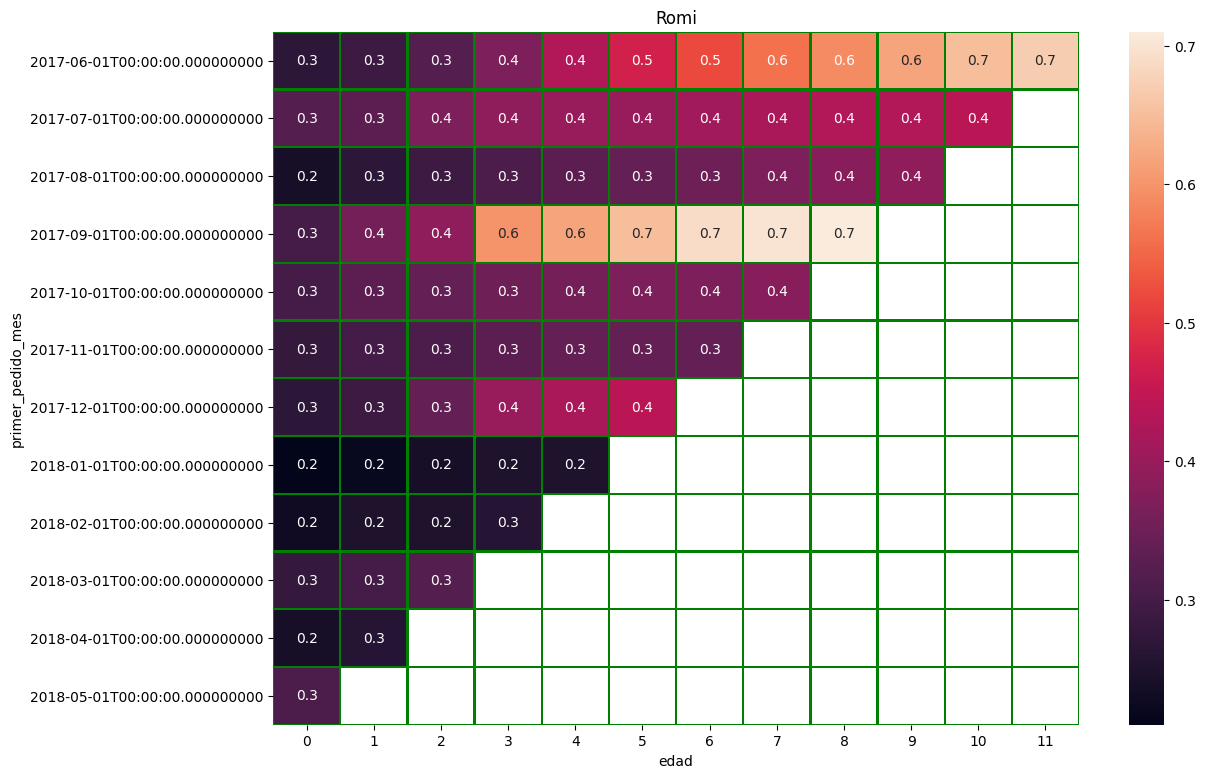

In [106]:
plt.figure(figsize=(13, 9))
plt.title('Romi')
sns.heatmap(
    pivot_romi,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='green',
)

Se observa que las cohortes de junio y septiembre tienen los mejores Romi 

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Los resultados de pivot_table es mejor mostrarlos en una gráfica tipo mapa de calor que sólo la tabla cómo tal
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Excelente! Siempre busca dejar los resultados en algo más visual para que sea más fácil de entender y explicar los mismos
</div>

In [107]:
reporte_costo=pd.merge(reporte_unido, costo, on='mes')
reporte_costo.head(2)

,primer_pedido_mes,n_compradores,mes,ganancia,gp,edad,ltv,costo_x,cac,romi,anuncio,fecha,costo_y
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207,18015.0,8.905091,0.265265,1,2017-06-01,75.20
1,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207,18015.0,8.905091,0.265265,1,2017-06-02,62.25


COSTO POR TIPO DE ANUNCIO

In [108]:
costo_tipo_anuncio=reporte_costo.groupby('anuncio')['cac'].sum()
costo_tipo_anuncio

anuncio
1     21882.727881
2     21882.727881
3     21882.727881
4     21882.727881
5     21975.265102
9     21882.727881
10    21882.727881
Name: cac, dtype: float64

<AxesSubplot:xlabel='anuncio'>

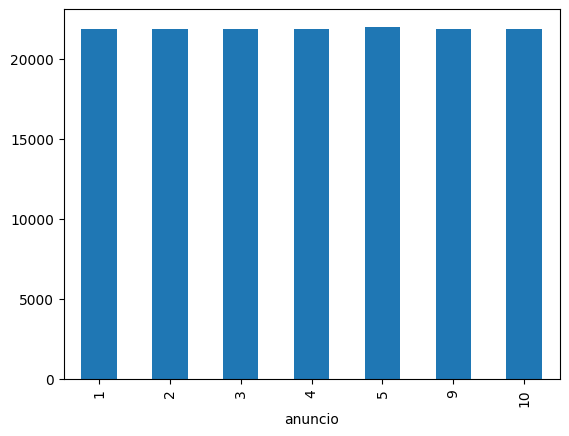

In [109]:
costo_tipo_anuncio.plot(kind='bar')

El costo de adquisicion de cliente para cada tipo de fuente de anuncio se ve muy parecido, opino que todas las fuentes de anuncio son rentables. Me enfoque en el costo de adquisicion cliente, porque aqui el costo ya esta dividido por el numero de clientes, es decir cuanto dinero se gasto pero cuantos clientes se adquirieron. 

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Tienes un buen avance Lucero, pero hace falta que se redacte más cada paso del análisis para que el notebook sea claro. Y aquí al final deberías tener una sección dedicada a la conclusión general donde hagas tipo un resúmen de los hallazgos más importantes del proyecto
</div>

CONCLUSION GENERAL

- Hubo mas usuarios de la pagina en Diciembre
- La conversion es rapida 1-2 dias
- El canal 2 de marketing tiene mayor numero de usuarios que regresan a visitar la pagina
- En diciembre se hacen mas pedidos
- Las cohortes de junio y septiembre presentan los mejores Romi 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con los cambios realizados! Siempre en casos con métricas de negocio tan complejas de calcular hay que buscar cómo explicar estos resultados de manera más sencilla y para esto las gráficas siempre son una gran herramienta.

Saludos!
</div>